In [1]:
import pandas as pd
import numpy as np

import statistics

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from scipy import stats

import researchpy as rp

Загрузить файл hr.csv (можно найти во сложении к заданию)

In [2]:
data=pd.read_csv("hr.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [5]:
# data.describe()
variables = ["satisfaction_level","last_evaluation","number_project",
             "average_montly_hours","time_spend_company"]
for col in variables:
    print(col)
    print(f"\tСреднее: {data[col].mean()}")
    print(f"\tМедиана: {statistics.median(data[col])}")
    print(f"\tМода: {statistics.mode(data[col])}")
    print(f"\tМин/Макс: {data[col].min()}/{data[col].max()}")
    print(f"\tСреднее отклонение: {data[col].std()}")
    

satisfaction_level
	Среднее: 0.6128335222348156
	Медиана: 0.64
	Мода: 0.1
	Мин/Макс: 0.09/1.0
	Среднее отклонение: 0.24863065106114257
last_evaluation
	Среднее: 0.7161017401160078
	Медиана: 0.72
	Мода: 0.55
	Мин/Макс: 0.36/1.0
	Среднее отклонение: 0.17116911062327533
number_project
	Среднее: 3.80305353690246
	Медиана: 4
	Мода: 4
	Мин/Макс: 2/7
	Среднее отклонение: 1.2325923553183522
average_montly_hours
	Среднее: 201.0503366891126
	Медиана: 200
	Мода: 135
	Мин/Макс: 96/310
	Среднее отклонение: 49.94309937128408
time_spend_company
	Среднее: 3.498233215547703
	Медиана: 3
	Мода: 3
	Мин/Макс: 2/10
	Среднее отклонение: 1.4601362305354812


Рассчитать и визуализировать корреляционную матрицу для переменных

In [6]:
# data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

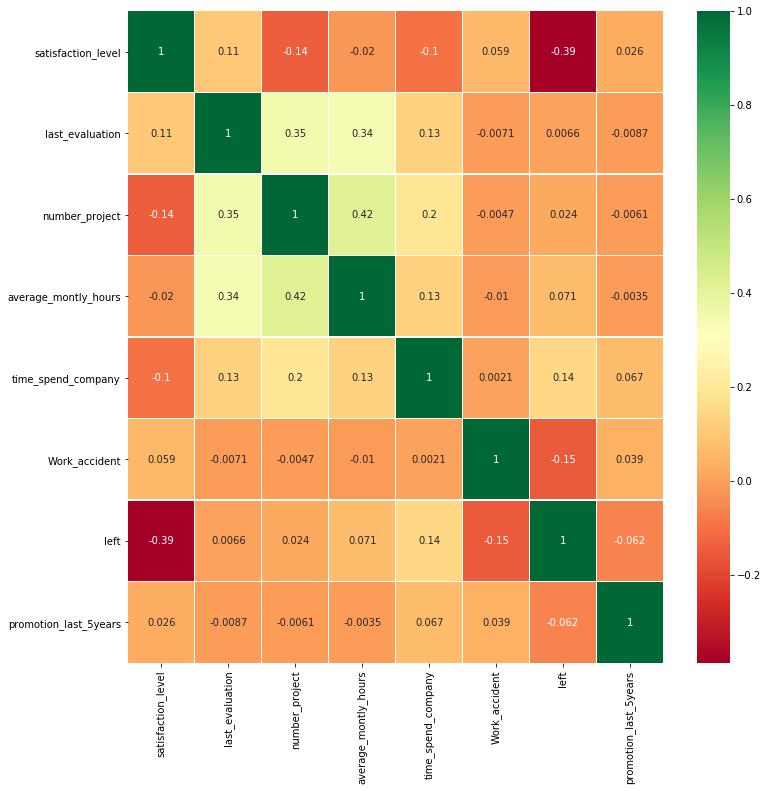

In [7]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Визуализировать несколько взаимосвязей между переменными

In [8]:
# sns.pairplot(data)

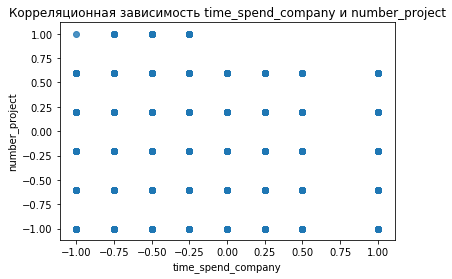

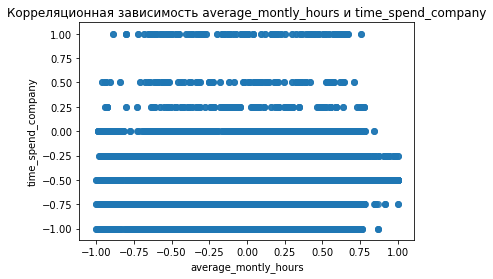

In [26]:
# print(type(data))
def check_correllations(df, col_x:str, col_y:str):    
    min_max_scaler = MinMaxScaler(feature_range=(-1,1))
    X = min_max_scaler.fit_transform(np.array(df[col_x]).reshape(-1, 1))
    y = min_max_scaler.fit_transform(np.array(df[col_y]).reshape(-1, 1)) 
    sns.regplot(x= X, y= y, data=df, fit_reg=False)
#     sns.regplot(x= X, y= y, data=df, fit_reg=True)
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.title(f'Корреляционная зависимость {col_x} и {col_y}')
    plt.grid(False)
    plt.show()

variables = ["satisfaction_level","last_evaluation","number_project",
             "average_montly_hours","time_spend_company"]

check_correllations(data, variables[4], variables[2])
check_correllations(data, variables[3], variables[4])

С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [10]:
# descriptives, results = rp.ttest(data["satisfaction_level"], data["number_project"])
# print(descriptives)
# print(results)

In [11]:
p_limit = 0.05

#нулевая гипотеза - группы схожи
set_1 = data["satisfaction_level"]
set_2 = data["number_project"]

stat, p = stats.ttest_ind(set_1, set_2)

# print(f"статистика: {stat:.4f}")
# print(f"p: {p:.4f}")
if p < p_limit:
    print(f"P ({p:.4f}) - меньше порогового ({p_limit}). \
              \nСоответственно, мы НЕ можем принять нулевую гипотезу. \
              \nСледовательно, вероятно, имеются различия между выборками")
else:
    print(f"P ({p:.4f}) - выше порогового ({p_limit}). \
            \nСоответственно, мы можем принять нулевую гипотезу. \
            \nСледовательно, вероятно, выбрки схожи")

P (0.0000) - меньше порогового (0.05).               
Соответственно, мы НЕ можем принять нулевую гипотезу.               
Следовательно, верятно, имеются различия между выборками


In [12]:
p_limit = 0.05

#нулевая гипотеза - группы схожи
set_1 = data["satisfaction_level"]
set_2 = data["number_project"]
set_3 = data["average_montly_hours"]

stat, p = stats.f_oneway(set_1, set_2, set_3)

if p < p_limit:
    print(f"P ({p:.4f}) - меньше порогового ({p_limit}). \
              \nСоответственно, мы НЕ можем принять нулевую гипотезу. \
              \nСледовательно, вероятно, имеются различия между выборками")
else:
    print(f"P ({p:.4f}) - выше порогового ({p_limit}). \
            \nСоответственно, мы можем принять нулевую гипотезу. \
            \nСледовательно, вероятно, выбрки схожи")

P (0.0000) - меньше порогового (0.05).               
Соответственно, мы НЕ можем принять нулевую гипотезу.               
Следовательно, верятно, имеются различия между выборками


Рассчитать сколько работников работает в каждом департаменте

In [13]:
# data.groupby("sales")["sales"].count()
data["sales"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

Показать распределение сотрудников по зарплатам

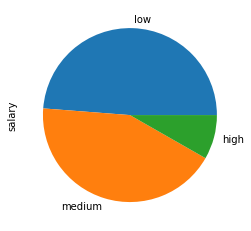

In [14]:
# data["salary"].hist()
data["salary"].value_counts().plot(kind = "pie")

Показать распределение сотрудников по зарплатам совместно с департаментами

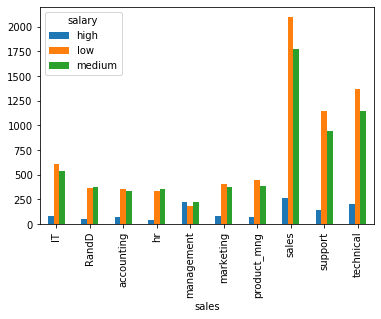

In [15]:
data.groupby(["sales","salary"])["salary"].count().unstack(fill_value=0).plot.bar()

Сколько сотрудников покинули компанию

In [16]:
res = data[data["left"]==1]["left"].count()
print(f"{res} сотрудников покинули компанию")

3571 сотрудников покинули компанию


Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [17]:
col_name = "satisfaction_level"
descriptives, results = rp.ttest(data[data["left"]==0][col_name], data[data["left"]==1][col_name])
print(descriptives)
print(results)

             Variable        N      Mean        SD        SE  95% Conf.  \
0  satisfaction_level  11428.0  0.666810  0.217104  0.002031   0.662829   
1  satisfaction_level   3571.0  0.440098  0.263933  0.004417   0.431438   
2            combined  14999.0  0.612834  0.248631  0.002030   0.608854   

   Interval  
0  0.670790  
1  0.448758  
2  0.616813  
                                  Independent t-test     results
0  Difference (satisfaction_level - satisfaction_...      0.2267
1                              Degrees of freedom =   14997.0000
2                                               t =      51.6128
3                           Two side test p value =       0.0000
4                          Difference < 0 p value =       1.0000
5                          Difference > 0 p value =       0.0000
6                                       Cohen's d =       0.9895
7                                       Hedge's g =       0.9894
8                                   Glass's delta =       

average_montly_hours

In [18]:
col_name = "last_evaluation"#"average_montly_hours"
descriptives, results = rp.ttest(data[data["left"]==0][col_name], data[data["left"]==1][col_name])
print(descriptives)
print(results)

          Variable        N      Mean        SD        SE  95% Conf.  Interval
0  last_evaluation  11428.0  0.715473  0.162005  0.001515   0.712503  0.718444
1  last_evaluation   3571.0  0.718113  0.197673  0.003308   0.711627  0.724598
2         combined  14999.0  0.716102  0.171169  0.001398   0.713362  0.718841
                                  Independent t-test     results
0  Difference (last_evaluation - last_evaluation) =      -0.0026
1                              Degrees of freedom =   14997.0000
2                                               t =      -0.8042
3                           Two side test p value =       0.4213
4                          Difference < 0 p value =       0.2106
5                          Difference > 0 p value =       0.7894
6                                       Cohen's d =      -0.0154
7                                       Hedge's g =      -0.0154
8                                   Glass's delta =      -0.0163
9                                 

P-value больше 0.05. Следовательно выборки статистически похожи
Таким образом, можно предположить что последняя оценка не влияет на увольнение сотрудника из компании